### Rajvi Parekh


# GRIP - THE SPARKS FOUNDATION

### DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

(BATCH-APRIL 2021)

### Prediction using unsupervised learning

### Problem statement:
To predict the optimum number of clusters and represent it visually from the given iris data.

In this model we will find the number of clusters in iris data by K-Means clustering algorithim

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:

data=pd.read_csv('Iris.csv')


In [ ]:
#data information
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#Describing the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#checking null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We can see there are no null value in dataset

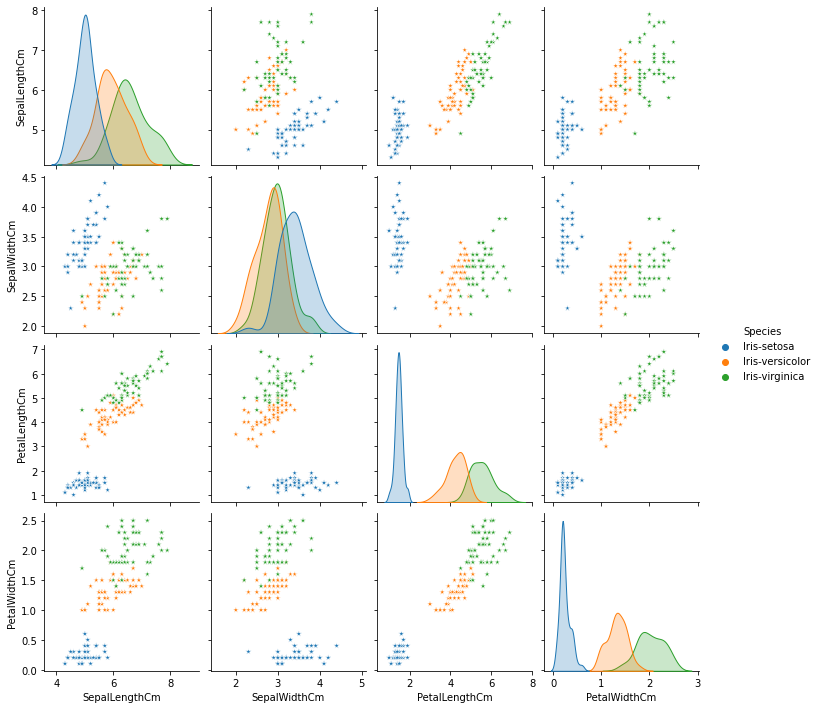

In [ ]:
#Droping the ID column and creating plot
temp=data.drop('Id', axis=1)
g=sns.pairplot(temp,hue='Species',markers='*')
plt.show()

### Finding out clusters with KMeans clustering

In [ ]:
x=data.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init ='k-means++',
                        max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss                        

[281831.54466666665,
 70581.3808,
 31320.711199999998,
 17762.657226173542,
 11423.238080088988,
 7909.530673076923,
 5881.448116883117,
 4562.7800793650795,
 3579.72056127451]

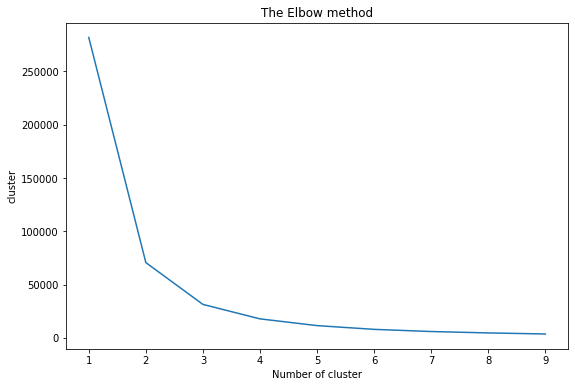

In [ ]:
#ploting graph
plt.figure(figsize=(9,6))
plt.plot(range(1,10),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('cluster')
plt.show()

From the above graph we can find out the optimum number of clusters to be 3 as the elbow starts having a straight trend after 3

In [ ]:
#Appling Kmeans
kmeans= KMeans(n_clusters = 3, init = 'k-means++',
              max_iter = 300, n_init = 10, random_state = 0)
y=kmeans.fit_predict(x)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
cl=pd.Series(kmeans.labels_)
data['cluster']=cl

## Visualising the clusters

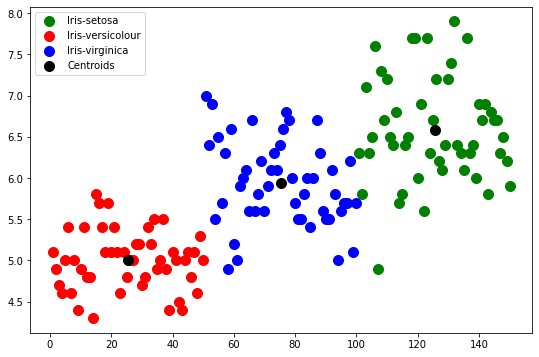

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(x[y == 0,0],x[y == 0,1],
           s= 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y == 1,0],x[y == 1,1],
           s= 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y == 2,0],x[y == 2,1],
           s= 100, c = 'blue', label = 'Iris-virginica')

#ploting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s= 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

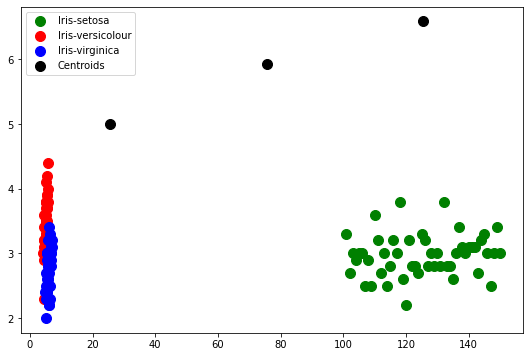

In [ ]:
#visualising the clusters - On the first two columns
plt.figure(figsize=(9,6))
plt.scatter(x[y == 0,0],x[y == 0,2],
           s= 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y == 1,1],x[y == 1,2],
           s= 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y == 2,1],x[y == 2,2],
           s= 100, c = 'blue', label = 'Iris-virginica')

#ploting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s= 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

## Representing the data with the cluster column

In [ ]:
data.iloc[:,:]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0


In [ ]:
x=[5.1,4.6,3.0,6.7]
kmeans.predict([x])


array([1], dtype=int32)

Hence we can assume that our model prediction is accurate.